# Loss surface of the models
In this notebook we explore the loss landscape visualization.

In [48]:
import os
import sys
from collections import defaultdict
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)
from plotting_utility import *

Let's load the available plot in a dictionary:

In [49]:

precisions = [4, 6, 8, 10, 12]
INDEX = 1 # change to choose which model's loss do you want to plot
plot_metrics = defaultdict()
for p in precisions:
    path = os.path.join(DATA_PATH, f"bs1024_lr0.0015625/ECON_{p}b")
    plot_metrics[f"Baseline ({p} bits)"] = load_from_pickle(path, f"plot_{INDEX}.pkl")
    for tag in ['JREG_0.1', 'LIP_0.00001']:
        path = os.path.join(DATA_PATH, f"bs1024_lr0.0015625/ECON_{tag}_{p}b")    
        plot_metrics[f"{labels[tag]} ({p} bits)"] = load_from_pickle(path, f"plot_{INDEX}.pkl")

## 2D loss visualization

In [50]:
MIN = -0.05
MAX = 0.125

Compare the loss of models with different bit-width:

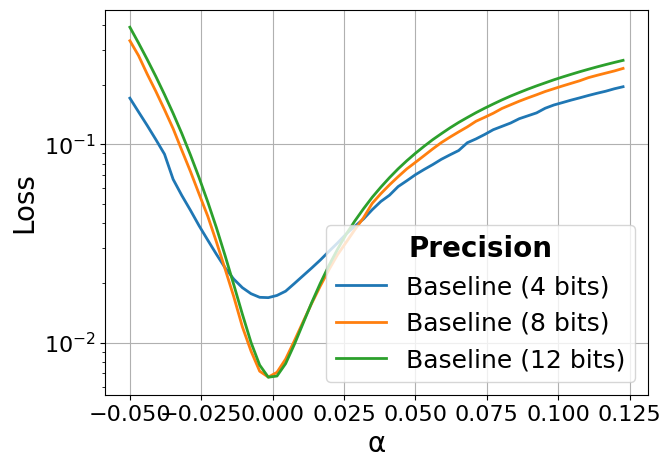

In [51]:
plt.figure(figsize=FIG_SIZE) 

for label, value in plot_metrics.items():
    if "Baseline" in label:
        lam = value["hessian_line"]["lambda"]
        loss = value["hessian_line"]["loss"]
        if "6" in label or "10" in label:
            continue
        if MAX is not None and MIN is not None:
            mask = (lam >= MIN) & (lam <= MAX)
            lam, loss = np.array(lam)[mask], np.array(loss)[mask]
        plt.plot(lam, loss, label=label, linewidth=LINE_WIDTH)

plt.grid(True)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=TICK_SIZE-2)  # Increase major tick label size
plt.ylabel("Loss", fontsize=LABEL_SIZE)
plt.xlabel("α", fontsize=LABEL_SIZE)
legend = plt.legend(title="Precision", fontsize=LABEL_SIZE-2)
legend.set_title("Precision", prop={'size': LABEL_SIZE, 'weight': 'bold'})  # Additional customization for title
plt.show()

Compare the loss of model fine-tuned with different regularization:

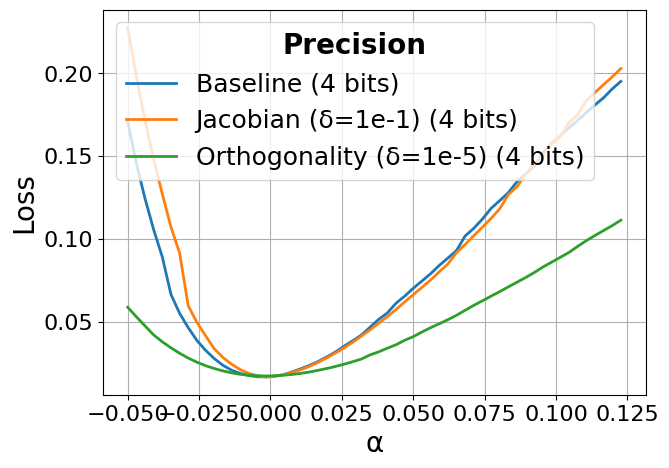

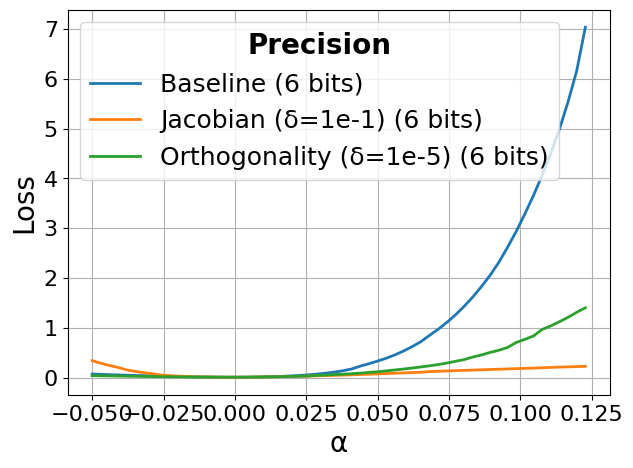

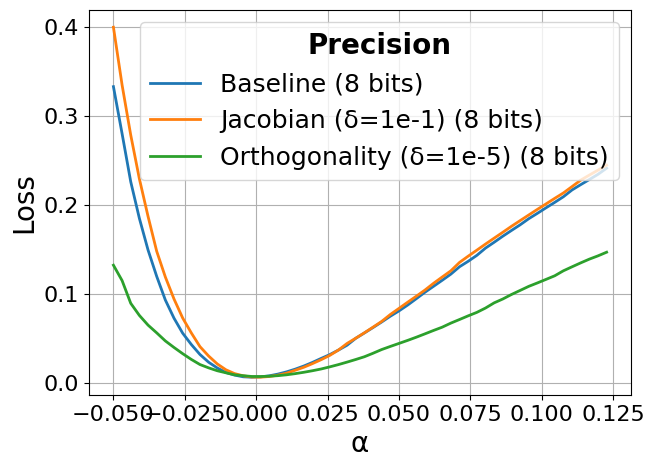

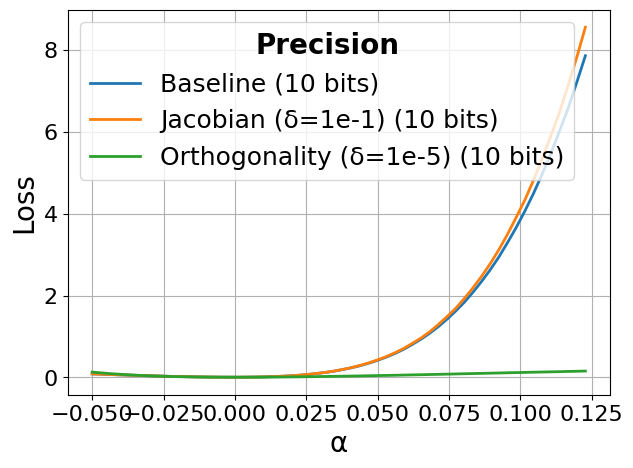

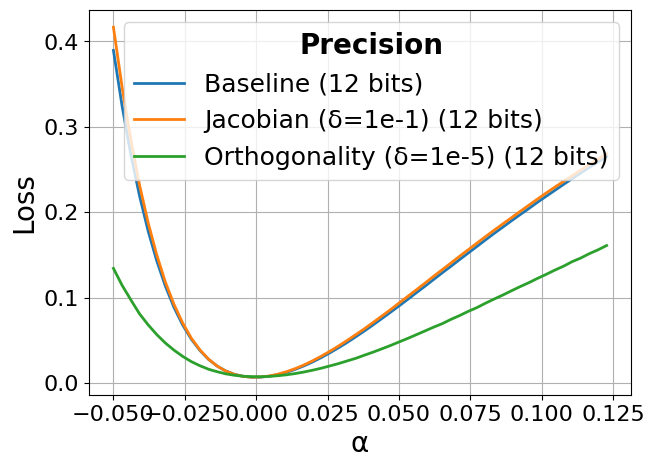

In [52]:
for p in precisions:
    plt.figure(figsize=FIG_SIZE)  
    for label, value in plot_metrics.items():
        if str(p) in label:
            lam = value["hessian_line"]["lambda"] 
            loss = value["hessian_line"]["loss"] 
            if MAX is not None and MIN is not None:
                mask = (lam >= MIN) & (lam <= MAX)
                lam, loss = np.array(lam)[mask], np.array(loss)[mask]
            
            plt.plot(lam, loss, label=label, linewidth=LINE_WIDTH)

    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=TICK_SIZE-2)  # Increase major tick label size
    plt.ylabel("Loss", fontsize=LABEL_SIZE)
    plt.xlabel("α", fontsize=LABEL_SIZE)
    legend = plt.legend(title="Precision", fontsize=LABEL_SIZE-2)
    legend.set_title("Precision", prop={'size': LABEL_SIZE, 'weight': 'bold'})  
    plt.show()

## 3D loss visualization

3D Loss Surface for Baseline (4 bits)


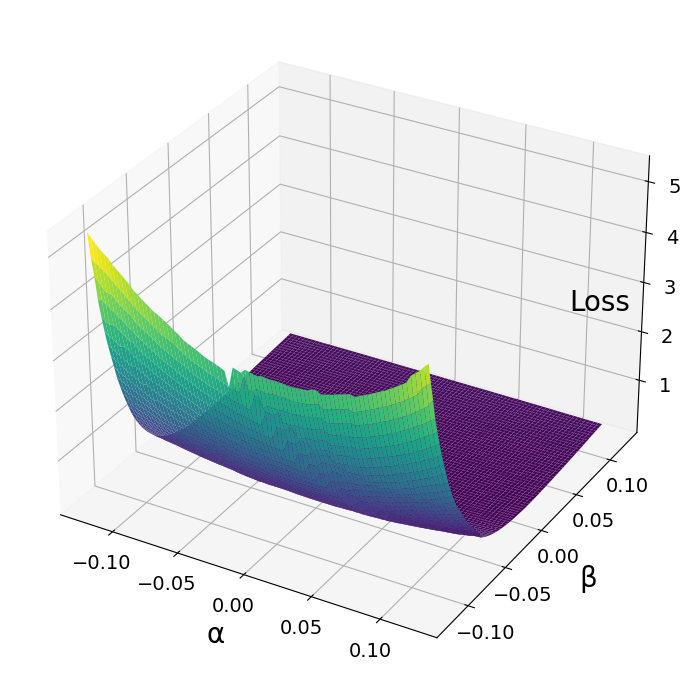

3D Loss Surface for Jacobian (δ=1e-1) (4 bits)


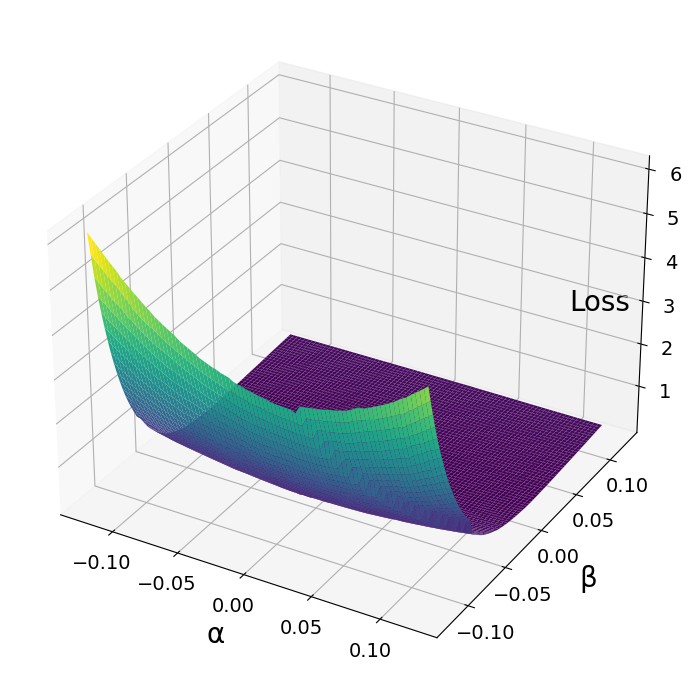

3D Loss Surface for Orthogonality (δ=1e-5) (4 bits)


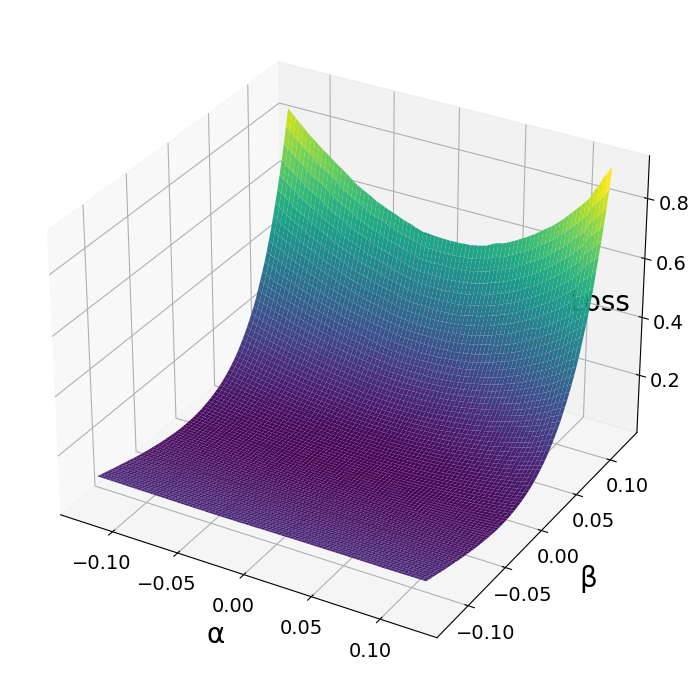

3D Loss Surface for Baseline (6 bits)


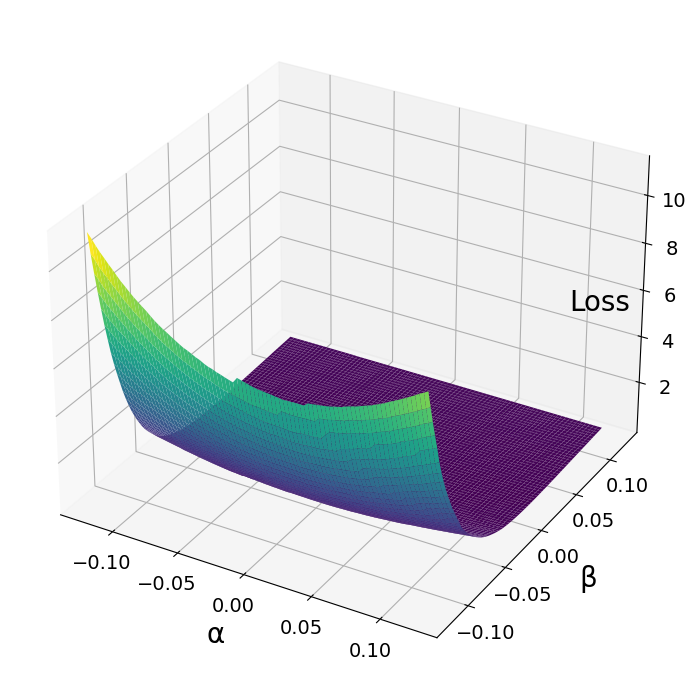

3D Loss Surface for Jacobian (δ=1e-1) (6 bits)


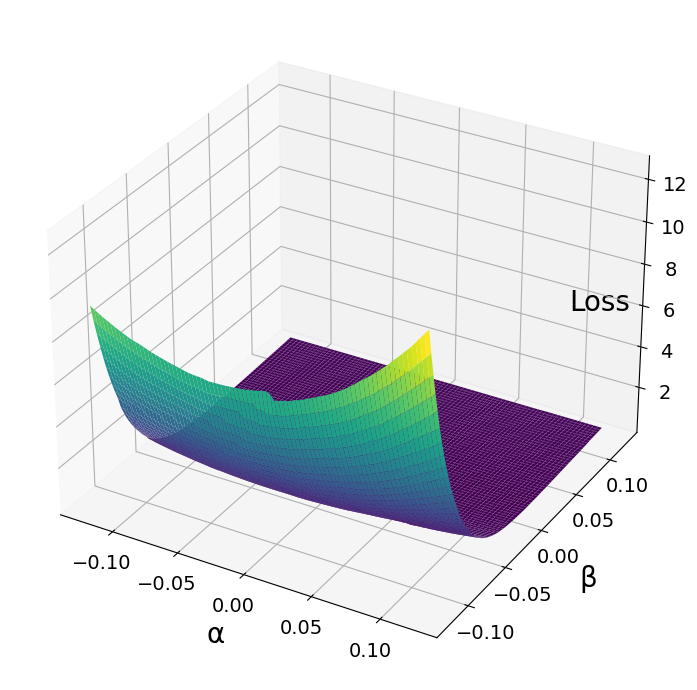

3D Loss Surface for Orthogonality (δ=1e-5) (6 bits)


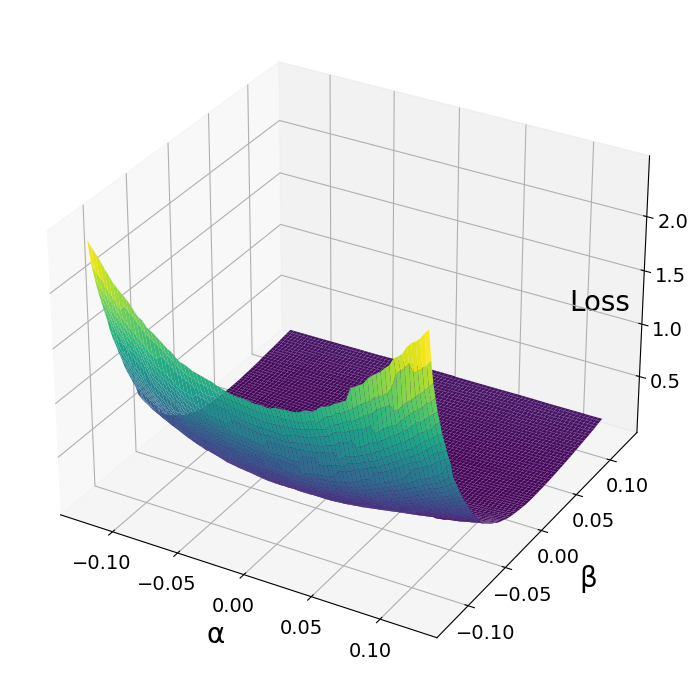

3D Loss Surface for Baseline (8 bits)


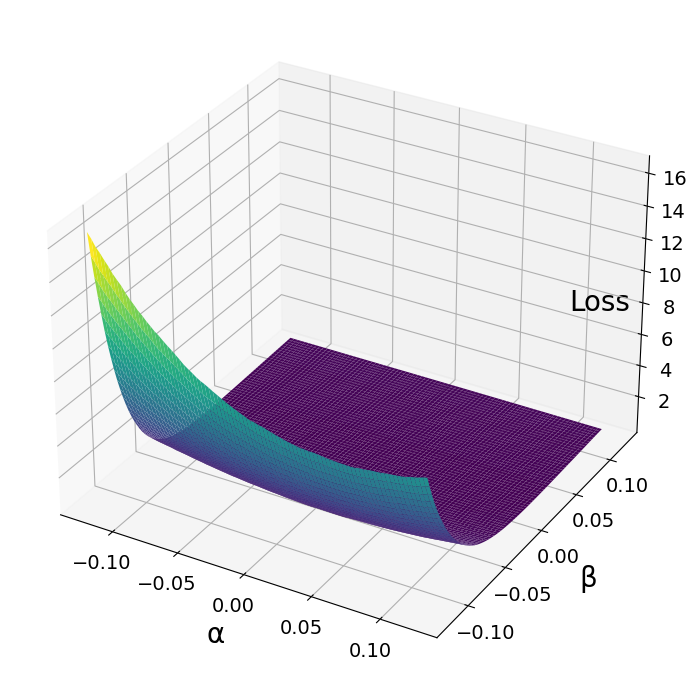

3D Loss Surface for Jacobian (δ=1e-1) (8 bits)


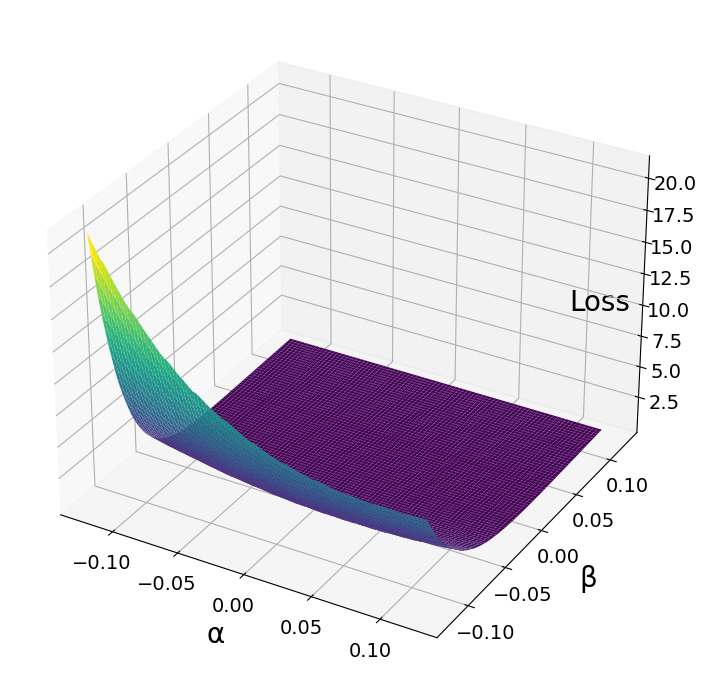

3D Loss Surface for Orthogonality (δ=1e-5) (8 bits)


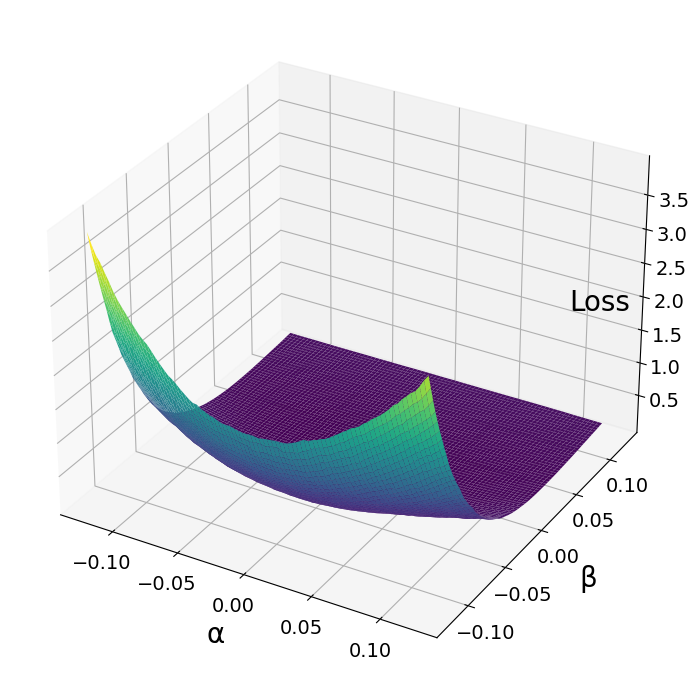

3D Loss Surface for Baseline (10 bits)


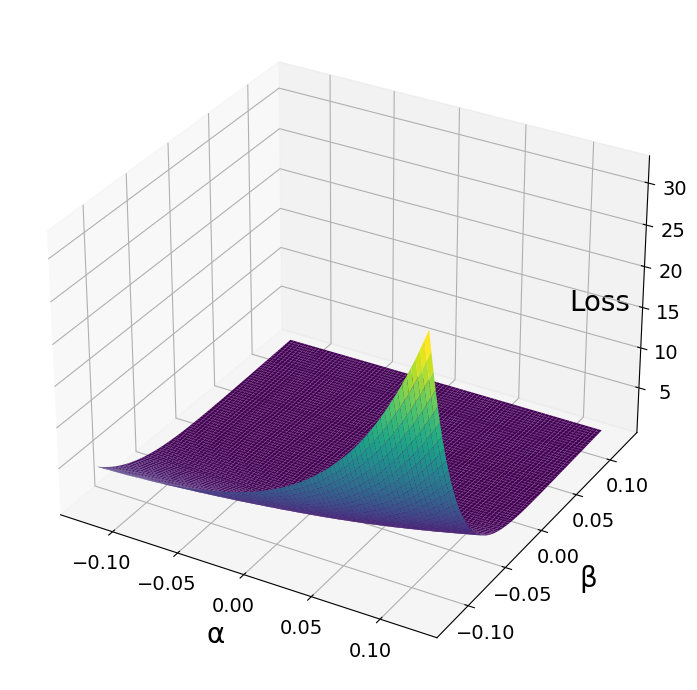

3D Loss Surface for Jacobian (δ=1e-1) (10 bits)


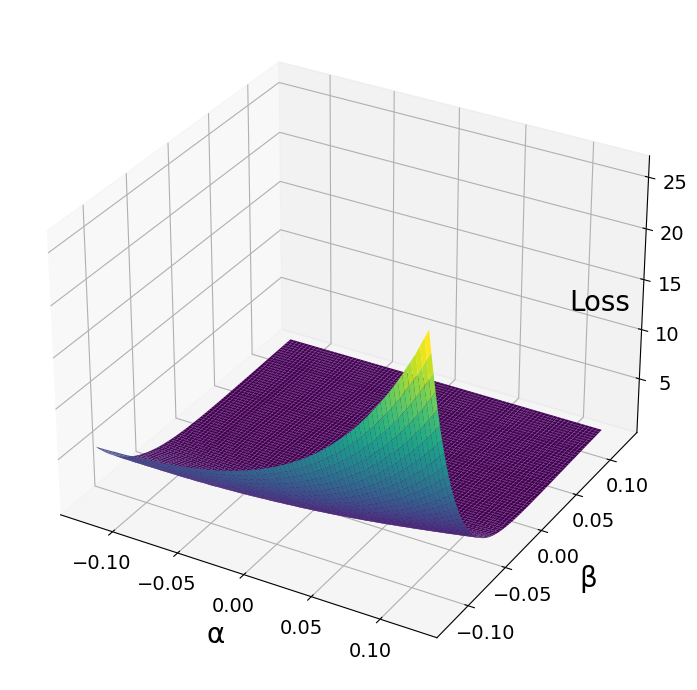

3D Loss Surface for Orthogonality (δ=1e-5) (10 bits)


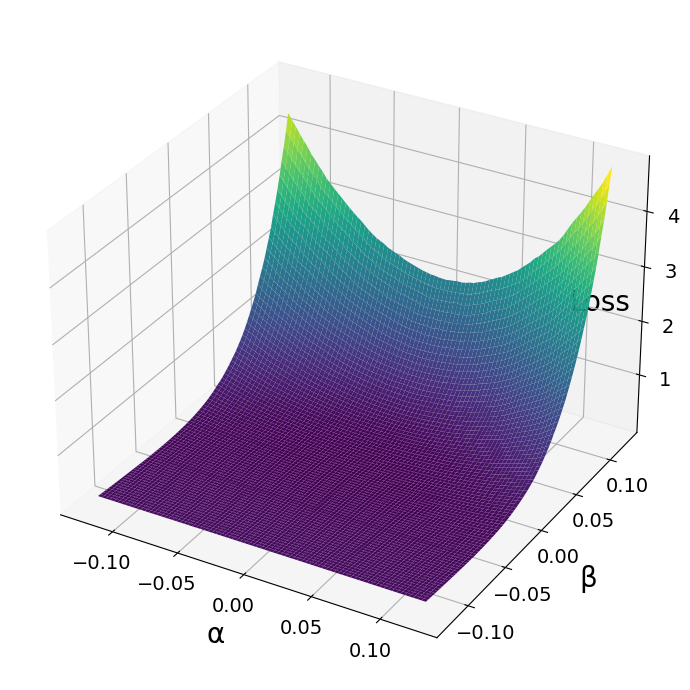

3D Loss Surface for Baseline (12 bits)


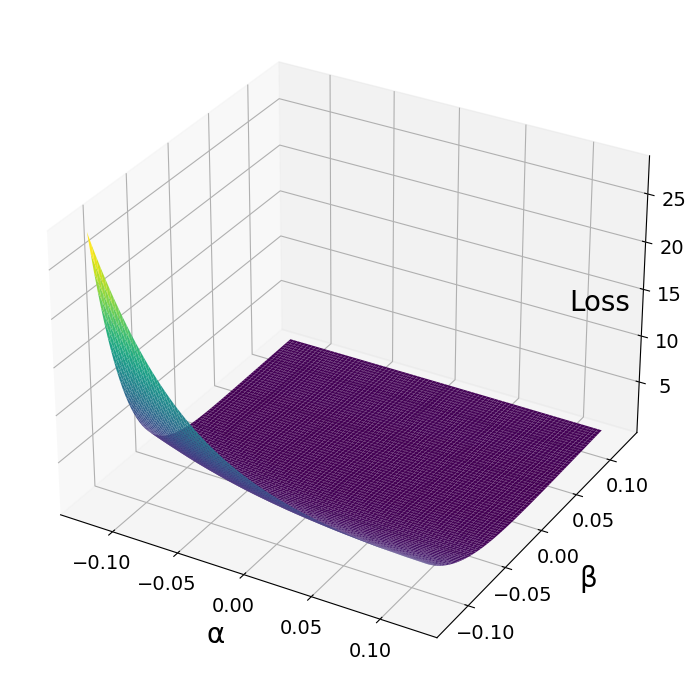

3D Loss Surface for Jacobian (δ=1e-1) (12 bits)


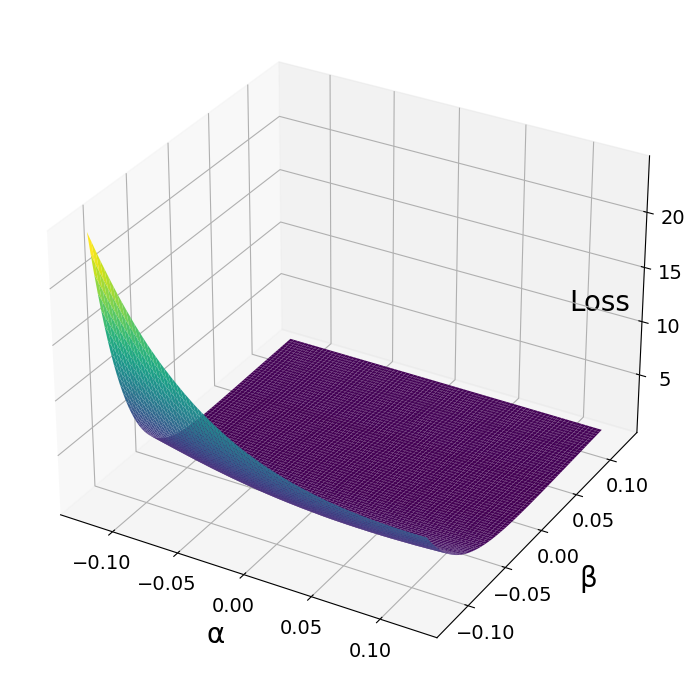

3D Loss Surface for Orthogonality (δ=1e-5) (12 bits)


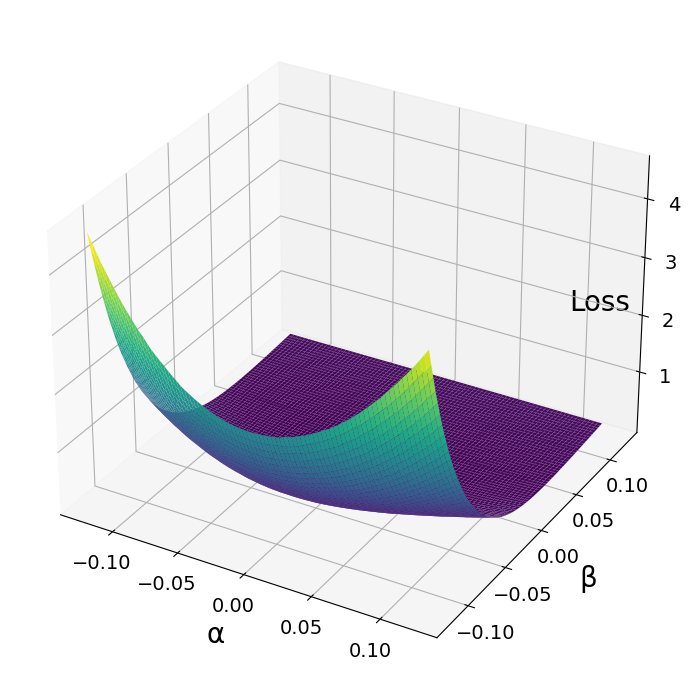

In [53]:
direction = "hessian" # random

for label, value in plot_metrics.items():
    lam1 = np.array(value[f"{direction}_plane"]["lambda1"])
    lam2 = np.array(value[f"{direction}_plane"]["lambda2"])
    loss = np.array(value[f"{direction}_plane"]["loss"])
    
    # Apply masking for `lam1` and `lam2` ranges
    if MAX is not None:
        mask1 = (lam1 >= -MAX) & (lam1 <= MAX)
        mask2 = (lam2 >= -MAX) & (lam2 <= MAX)
        lam1, lam2 = lam1[mask1], lam2[mask2]
        loss = loss[np.ix_(mask1, mask2)]  # Apply mask to 2D loss array

    # Create a plot
    fig = plt.figure(figsize=(7, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create a meshgrid
    lam1_mesh, lam2_mesh = np.meshgrid(lam1, lam2)
    
    # Plot the surface
    surf = ax.plot_surface(
        lam1_mesh, lam2_mesh, loss,
        rstride=1, cstride=1,
        cmap='viridis', edgecolor='none'
    )
    
    # Add title and labels
    ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE-4)  # Increase major tick label size
    print(f'3D Loss Surface for {label}')
    ax.set_xlabel('α', fontsize=LABEL_SIZE, labelpad=10)
    ax.set_ylabel('β', fontsize=LABEL_SIZE, labelpad=10)
    ax.set_zlabel('Loss', fontsize=LABEL_SIZE, labelpad=-40)
    ax.zaxis.set_label_coords(0, 0, 1000)  # Moves Z label upward
    # plt.subplots_adjust(right=5)
    plt.tight_layout()
    # Show the plot
    plt.show()
